# **GATED RECURRENT UNIT**

Gated Recurrent Unit yang kemudian disingkat sebagai GRU merupakan salah satu algoritma pengembangan dari Recurrent Neural Network (RNN). GRU pertama kali diperkenalkan pada tahun 2014 oleh Kyunghyun Cho dkk dengan tujuan untuk mengatasi masalah vanishing gradient dan exploding gradient yang biasa terjadi pada RNN.

## **INSTALL TENSORFLOW VERSION**

Dalam proses analisis data, digunakan framework open source tensorflow. TensorFlow adalah pilihan yang sangat baik untuk analisis menggunakan GRU karena menawarkan kombinasi yang kuat antara fitur, ekosistem, skalabilitas, dan fleksibilitas.

Versi tensorflow yang digunakan pada penelitian ini yaitu tensorflow versi 2.15.0

In [ ]:
!pip install tensorflow==2.15.0
!pip install keras==2.15.0

## **INSTALL PACKAGE** 📦

In [ ]:
# BASIC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import statistics
import random

# TENSORFLOW
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import load_model

# SKLEARN
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

**KETERANGAN**

`import numpy as np`

Untuk komputasi numerik di python. Untuk array multidimensi dan fungsi matematika untuk operasi array tersebut.

.

`import pandas as pd`

Untuk manipulasi dan analisis data yang mendukung struktur data seperti DataFrame/ pengolahan tabel

.

`import matplotlib.pyplot as plt`

Membuat visualisasi data dalam bentuk grafik dan plot

.

`from datetime import datetime, timedelta`

Memanipulasi tanggal dan waktu

.

`import math`

Menyediakan fungsi-fungsi matematika dasar

============================================================================

`import tensorflow as tf`
`from tensorflow import keras`

pustaka open-source untuk pembelajaran mesin yang digunakan untuk berbagai tugas seperti jaringan saraf tiruan. Keras adalah antarmuka tingkat tinggi untuk TensorFlow yang menyediakan API yang lebih sederhana dan modular untuk membuat dan melatih model pembelajaran mesin.

.

`from keras import Input`

Digunakan untuk mendefinisikan input layer dalam model.

.

`from keras.callbacks import EarlyStopping, ModelCheckpoint`

`EarlyStopping` Callback untuk menghentikan pelatihan lebih awal jika metrik tertentu tidak meningkat.

`ModelCheckpoint` Callback untuk menyimpan model atau bobot pada interval tertentu.

.

`from keras.optimizers import Adam`
`from keras.optimizers import RMSprop`

Optimizer yang digunakan untuk memperbarui bobot model berdasarkan gradien.

.

`from keras.models import Sequential`

Jenis model yang lapisannya ditumpuk secara berurutan.

.

`from keras.layers import GRU, Dense, Dropout`

Jenis lapisan dalam jaringan saraf. GRU adalah jenis RNN, Dense adalah lapisan yang sepenuhnya terhubung, dan Dropout adalah teknik regularisasi untuk mencegah overfitting.

==========================================================================================================

`import sklearn`

Scikit-Learn adalah pustaka untuk pembelajaran mesin di Python.

.

`from sklearn.preprocessing import MinMaxScaler`

Digunakan untuk normalisasi fitur dengan mengubah skala setiap fitur sehingga berada dalam rentang yang ditentukan.

.

`from sklearn.model_selection import
train_test_split, ParameterGrid`

Digunakan untuk melakukan pencarian grid pada parameter.

.

`from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error`

Metode evaluasi untuk mengukur kesalahan prediksi model.

## **UPLOAD DATA** 📑

Untuk upload file

1. Pastikan Google Colab sudah `Connect` pada bagian atas (ditandai dengan adanya tanda centang hijau)
2. Klik menu `Files` pada bagian samping jendela console
3. Klik kanan pada jendela `Files`, lalu pilih `Upload`
4. Pilih dataset yang akan digunakan (dalam format `csv.`)

Data yang telah diupload dalam bentuk `csv.`, kemudian dibaca menggunakan `pandas` dan didefinisikan sebagai `df`



In [ ]:
df=pd.read_csv('/content/Dataset Timah.csv', sep=';', index_col=['Date'], parse_dates=['Date'])

**Keterangan**

* `sep` = separator, pemisah antar data dalam csv
* `index_col` = kolom yang dijadikan index, dalam hal ini yaitu `Date` yang menunjukkan tanggal haraga timah dicatat.
* `parse_date` = membuat kolom Date menjadi format date/tanggal

Menampilakn 5 data pertama

In [ ]:
df.head()

,Close
Date,
02/01/2019,19482.5
03/01/2019,19535.0
04/01/2019,19585.0
07/01/2019,19745.0
08/01/2019,19942.5


## **PLOT DATA** 📈

- Membuat plot data dengan nama `df_plot`. Data yang digunakan yaitu variabel/ kolom `Close` saja. Agar mencegah error karena penggunaan yang tumpang tindih, dibuat dataframe baru khusus plot data yang berisi kolom `Close` saja

- `figsize` merupakan ukuran dari gambar yang akan dibuat, `color` merupakan warna dari grafik yang dibuat

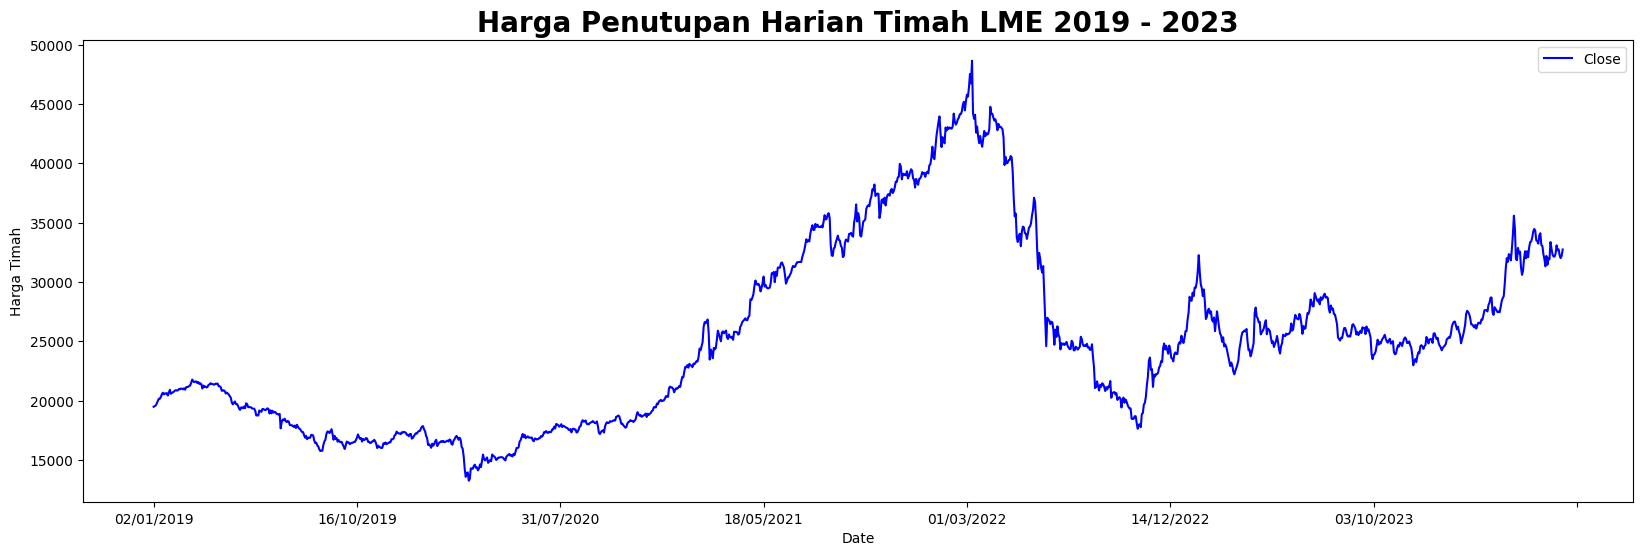


Jumlah Total Data :  1387


In [ ]:
# PLOT CLOSE PRICE

# Membuat dataframe khusus plot yang hanya berisi kolom Close
df_plot = df.copy()

# Membuat plot data
ax=df_plot.plot(figsize=(20,6), color='blue')

# Menambahkan judul serta label pada sumbu-x dan sumbu-y
plt.title('Harga Penutupan Harian Timah LME 2019 - 2023', fontsize=20, fontweight='bold') # Judul Grafik
plt.xlabel('Date') # Label sumbu-x
plt.ylabel('Harga Timah') # Label sumbu-y

# Menampilkan plot
plt.show()

# Menampilkan jumlah total data
print ('\n' 'Jumlah Total Data : ', len(df_plot))

## **STATISTIK DESKRIPTIF**

In [ ]:
stat_descriptive = df.describe().round(3)
stat_descriptive

,Close
count,1387.000
mean,25145.033
std,7640.333
min,13250.000
25%,18380.000
50%,24590.000
75%,29496.500
max,48650.000


In [ ]:
# Menyimpan statistik deskriptif dalam bentuk excel
stat_descriptive.to_excel('stat_descriptive.xlsx', index=False)

## **NORMALISASI**

In [ ]:
#Min-Max Normalization
df_norm = df.copy() # Membuat salinan dataframe
scaler = MinMaxScaler() #scaler menggunakan min max scaler
df_norm['Close_normalized'] = scaler.fit_transform(df[['Close']]) # Hasil normalisasi dari data close disimpan pada kolom Close Normalized
# Menampilkan df_norm
df_norm

,Close,Close_normalized
Date,,
02/01/2019,19482.5,0.176059
03/01/2019,19535.0,0.177542
04/01/2019,19585.0,0.178955
07/01/2019,19745.0,0.183475
08/01/2019,19942.5,0.189054
...,...,...
24/06/2024,32746.0,0.550734
25/06/2024,32251.0,0.536751
26/06/2024,32012.0,0.530000


## **DATA SPLITING**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Proporsi data test dan validation
test_size = 0.1  # 10% untuk test set
validation_size = 0.1  # 10% dari data training untuk validation set

# Membagi data menjadi data training dan data testing
train_data, test_data = train_test_split(df_norm['Close_normalized'].values, test_size=test_size, shuffle=False)

# Sekarang, bagi train_data lebih lanjut menjadi training set dan validation set
train_data, val_data = train_test_split(train_data, test_size=validation_size, shuffle=False)

# Menampilkan jumlah data training, validation, dan testing
print('JUMLAH PEMBAGIAN DATA\n')
print("Jumlah data training:", len(train_data), "dari", df_norm.index[0], "hingga", df_norm.index[len(train_data)-1])
print("Jumlah data validation:", len(val_data), "dari", df_norm.index[len(train_data)], "hingga", df_norm.index[len(train_data) + len(val_data)-1])
print("Jumlah data testing:", len(test_data), "dari", df_norm.index[len(train_data) + len(val_data)], "hingga", df_norm.index[len(df_norm)-1])

# Jumlah timesteps
time_step = 20

# Membagi data training menjadi data input dan data target
X_train, y_train = [], []
for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Membagi data validation menjadi data input dan data target
X_val, y_val = [], []
for i in range(time_step, len(val_data)):
    X_val.append(val_data[i-time_step:i])
    y_val.append(val_data[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Membagi data testing menjadi data input dan data target
X_test, y_test = [], []
for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Jika diperlukan reshape data test agar sesuai dengan format model
if len(X_test.shape) < 2:
    X_test = np.expand_dims(X_test, axis=1)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Data training, validation, dan test siap digunakan


JUMLAH PEMBAGIAN DATA

Jumlah data training: 1123 dari 02/01/2019 hingga 14/06/2023
Jumlah data validation: 125 dari 15/06/2023 hingga 07/12/2023
Jumlah data testing: 139 dari 08/12/2023 hingga 28/06/2024


In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)

X_train:  (1001, 20, 1)
y_train:  (1001,)
X_test:  (107, 20, 1)
y_test (107,)
X_val:  (94, 20, 1)
y_val:  (94,)


## **MODEL BUILDING**

> ## **Pemodelan GRU**

In [ ]:

# Random seed : agar nilai random tidak berubah
tf.random.set_seed(123)
random.seed(123)

# FUNGSI UNTUK MEMBUAT MODEL GRU
# Membangun model NN dan Mendefinisikan hyperparameter
def create_model(units, learning_rate, epochs, batch_size, optimizer):
    # Membuat model sequential
    model = Sequential()
    # Layer GRU pertama
    model.add(GRU(units=units, input_shape=(X_train.shape[1], 1), activation='tanh'))
    # Layer Dropout
    model.add(Dropout(0.3)) # Dropout 0.3 artinya 30% unit dinonaktifkan secara acak selama pembelajaran
    # Layer Output tunggal
    model.add(Dense(units=1)) # Layer output terdiri atas 1 unit/neuron

   #OPTIMIZER
    if optimizer == 'RMSprop':
        model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=learning_rate), metrics='mean_absolute_percentage_error')
    else:
        model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate), metrics='mean_absolute_percentage_error')

    return model # mengembalikan objek model yang telah dikonfigurasi sehingga bisa digunakan di tempat lain dalam kode.
    # Sehingga bisa memanggil fungsi tersebut beberapa kali dengan parameter yang berbeda untuk membuat dan melatih beberapa
    # Model dengan konfigurasi hyperparameter yang berbeda.



> ## **Tuning Hyperparameter**

In [ ]:
tf.random.set_seed(123)
random.seed(123)

# Mendefinisikan hyperparameter yang akan digunakan
param_grid = {
    'epochs': [50,100],  # Jumlah iterasi
    'batch_size': [32, 64, 128], # JUmlah batch dalam setiap iterasi
    'units': [16, 32, 64], # Jumlah hidden unit dalam setiap hidden layer
    'learning_rate': [0.01, 0.001, 0.0001], # Learning rate
    'optimizer' : ['Adam']
}
# Kombinasi hyperparameter
param_combinations = list(ParameterGrid(param_grid))

# Menyimpan hasil akhir dari model
result = []
# Menyimpan niali loss selama pelatihan model
losses = []


# MEMBUAT MODEL CHECKPOINT CALLBACK UNTUK MENYIMPAN MODEL TERBAIK SAAT PELATIHAN
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', # model terbaik akan disimpan dengan nama best_model.h5
                                      monitor='val_loss', # Menentukan metrik yang akan dipantau untuk menentukan model terbaik. Model dengan nilai val_loss terendah akan dianggap sebagai model terbaik.
                                      save_best_only=True, # Hanya model terbaik yang akan disimpan.
                                      mode='min', # min berarti bahwa metrik yang lebih rendah lebih baik, sehingga model dengan val_loss terendah akan disimpan.
                                      verbose=1 # verbose=1 akan menampilkan pesan di konsol setiap kali model terbaik disimpan. Ini memberikan informasi mengenai kapan checkpoint diambil.
                                      )
# MELATIH MODEL DENGAN SEMUA KOMBINASI HYPERPARAMETER
for params in param_combinations:
    print("==================================================================================================================")
    print(f"Training with params: {params}")
    print("==================================================================================================================\n")
    model = create_model(
        params['units'],
        params['learning_rate'],
        params['epochs'],
        params['batch_size'],
        params['optimizer'])

    early_stopping = EarlyStopping(patience=3, monitor='val_loss', verbose=1)
    # Early stopping digunakan untuk menghemat waktu, ini bekerja dengan menghentikan epoch ketika nilai loss tidak mengalami peningkatan
    # patiens=3 artinya epoch akan dihentikan ketika nilai loss tidak mengalami peningkatan setelah 3 epoch

    # Fungsi ini melatih model menggunakan data pelatihan (X_train dan y_train) selama beberapa epoch yang ditentukan.
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=params['epochs'], batch_size=params['batch_size'], callbacks=[early_stopping, checkpoint_callback])
    # history berisi riwayat pelatihan model, termasuk nilai loss dan metrik lainnya untuk setiap epoch.
    epoch_stopped = early_stopping.stopped_epoch
    # early_stopping adalah callback yang memonitor metrik tertentu (misalnya, val_loss) dan menghentikan pelatihan jika metrik tersebut tidak membaik setelah sejumlah epoch tertentu.
    # epoch_stopped adalah atribut dari callback early_stopping yang menyimpan nomor epoch di mana pelatihan dihentikan lebih awal.

    # HASIL NILAI LOSS DARI HISTORY
    # train_loss untuk loss dari data training pada proses pembelajaran
    train_loss = history.history['loss']
    # val_loss untuk loss dari data testing pada proses pengujian
    val_loss = history.history['val_loss']

    # mencatat nilai loss pada tiap epoch
    losses.append({'train_loss': train_loss, 'val_loss': val_loss})
    # losses = sebuah list yg menyimpan dictionary
    # setiap dictionary berisi nilai loss pada tiap epoch
    # append = digunakan untuk menambahkan elemen baru ke dalam list

    print('Train Loss Terendah: ', min(history.history['loss']))
    print('Epoch Stop: ', history.history['loss'].index(min(history.history['loss'])))
    print('Val Loss Terendah: ', min(history.history['val_loss']))
    print('Epoch Val Loss Stop: ', history.history['val_loss'].index(min(history.history['val_loss']))+1)
    print('==================================================================================================================\n')

    # MENYIMPAN HASIL KOMBIANSI HYPERPARAMETER
    # menyimpan hasil pemodelan berdasarkan kombinasi parameter dalam list
    result.append({**params, "Epoch Stopped": epoch_stopped, "Training Loss": min(train_loss), "Validation Loss": min(history.history['val_loss']), "Mape":mape})
    # nilai loss yang dicatat merupakan nilai loss minimum

# MENGUBAH DALAM BENTUK EXCEL
# membuat dataframe untuk result agar mudah untuk dianalisis (dibuat tabel)
result_df = pd.DataFrame(result)
# menyimpan result dalam format excel
result_df.to_excel(f'Result GRU Best Only {params["optimizer"]}.xlsx', index=False)

# MEMUAT MODEL TERBAIK
# Mencari baris dalam dataframe result_df yang memiliki nilai minimum val loss
# Menentukan parameter terbaik berdasarkan nilai minimum val loss
best_result = result_df.loc[result_df['Validation Loss'].idxmin()]
# membuat dictionary tanpa optimizer dan Epoch Stopped
best_params = best_result.drop(['Epoch Stopped','optimizer']).to_dict()
best_params = {param: float(value) for param, value in best_params.items()}


# MENAMPILKAN HYPERPARAMETER TERBAIK
print("Best Model Parameters:")
print(best_params)
print("Epoch Stopped:", epoch_stopped)
print("Training Loss:", best_result['Training Loss'].min())
print("Validation Loss:", best_result['Validation Loss'].min())



Training with params: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'optimizer': 'Adam', 'units': 16}

Epoch 1/50
32/35 [==========================>...] - ETA: 0s - loss: 0.0177 - mean_absolute_percentage_error: 70667.6172
Epoch 1: val_loss improved from inf to 0.00024, saving model to best_model.h5
35/35 [==============================] - 5s 28ms/step - loss: 0.0168 - mean_absolute_percentage_error: 65608.3047 - val_loss: 2.4349e-04 - val_mean_absolute_percentage_error: 3.3924
Epoch 2/50
31/35 [=========================>....] - ETA: 0s - loss: 0.0066 - mean_absolute_percentage_error: 17802.0508
Epoch 2: val_loss did not improve from 0.00024
35/35 [==============================] - 0s 12ms/step - loss: 0.0063 - mean_absolute_percentage_error: 16012.3242 - val_loss: 0.0012 - val_mean_absolute_percentage_error: 9.3788
Epoch 3/50
34/35 [============================>.] - ETA: 0s - loss: 0.0053 - mean_absolute_percentage_error: 44946.7891
Epoch 3: val_loss improved from 0.00024 to

 ## **PREDIKSI DENGAN BEST MODEL**

In [ ]:
tf.random.set_seed(123)
random.seed(123)
##=====================================================================================================================================================##
# PREDIKSI DATA LATIH & UJI BERDASARKAN MODEL TERBAIK
# Load model terbaik

best_model = load_model('best_model.h5')


# menyimpan prediksi dari model terbaik pada data train
y_pred_train_best = best_model.predict(X_train)
# menyimpan prediksi dari model terbaik pada data test
y_pred_test_best = best_model.predict(X_test)

# DENORMALISASI DATA
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_pred_train_inverse = scaler.inverse_transform(y_pred_train_best.reshape(-1, 1)).flatten()
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_test_inverse = scaler.inverse_transform(y_pred_test_best.reshape(-1, 1)).flatten()

# MENYIMPAN PREDIKSI SEBELUM DENORMALISASI
y_train_normalized_series = pd.Series(y_train, name='y_train_normalized')
y_pred_train_normalized = pd.Series(y_pred_train_best.flatten(), name='y_pred_train_normalized')
y_train_series = pd.Series(y_train_inverse, name='y_train')
y_pred_train_series = pd.Series(y_pred_train_inverse, name='y_pred_train')

y_test_normalized_series = pd.Series(y_test, name='y_test_normalized')
y_pred_test_normalized = pd.Series(y_pred_test_best.flatten(), name='y_pred_test_normalized')
y_test_series = pd.Series(y_test_inverse, name='y_test')
y_pred_test_series = pd.Series(y_pred_test_inverse, name='y_pred_test')

# MENGGABUNGKAN DATA DALAM SATU DATA FRAME DAN MENYIMPANNYA DALAM BENTUK EXCEL
# Data Train
predict_train_df = pd.concat([y_train_normalized_series, y_pred_train_normalized, y_train_series, y_pred_train_series], axis=1)
predict_train_df['Date'] = df.iloc[time_step:time_step+len(y_train)].index
predict_train_df.to_excel('actual vs predictions training.xlsx', index=False)
#Data Test
predict_test_df = pd.concat([y_test_normalized_series, y_pred_test_normalized, y_test_series, y_pred_test_series], axis=1)
predict_test_df['Date'] = df.iloc[-len(y_test):].index
predict_test_df.to_excel('actual vs predictions testing.xlsx', index=False)

##====================================================================================================================================================##
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_test_inverse)
print('\n')
print('===============================================')
print('Nilai MAPE :')
print(mape)
print('===============================================')


4/4 [==============================] - 0s 5ms/step


Nilai MAPE :
0.012994266107830514


In [ ]:
# Optional, hanya checking
# Check time_step dan panjang data dari df
print(f"time_step: {time_step}")
print(f"len(df): {len(df)}")
print(f"len(y_train): {len(y_train)}")

if time_step >= len(df) or time_step + len(y_train) <= 0:
    print("Error: Invalid time_step value.")
else:
    predict_train_df['Date'] = df.iloc[time_step:time_step + len(y_train)].index

time_step: 20
len(df): 1262
len(y_train): 1115


 ### **Menyimpan Bobot Terbaik dari Model Terbaik (Model Checkpoint)**

In [ ]:
# Mendapatkan bobot dari model terbaik
weights = best_model.get_weights()
# Save weights to Excel
with pd.ExcelWriter('best_model_weights.xlsx') as writer:
    for i, weight in enumerate(weights):
        bobot = pd.DataFrame(weight)
        bobot.to_excel(writer, sheet_name=f'Layer_{i+1}', index=False)

## **GRAFIK AKTUAL DAN PREDIKSI**

<ipython-input-20-ce9c6661fb58>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  predict_test_df['Date'] = pd.to_datetime(predict_test_df['Date'])


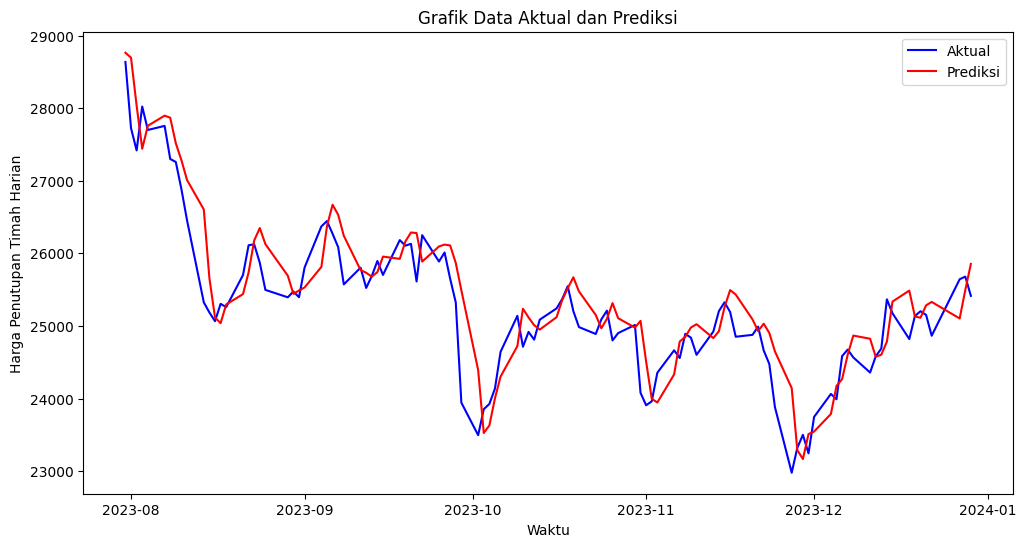

In [ ]:
# Menentukan size gambar
plt.figure(figsize=(12,6))
predict_test_df['Date'] = pd.to_datetime(predict_test_df['Date'])
plt.plot(predict_test_df['Date'], predict_test_df['y_test'], label='Aktual', color='blue')
plt.plot(predict_test_df['Date'], predict_test_df['y_pred_test'], label='Prediksi', color='red')
plt.xlabel('Waktu')
plt.ylabel('Harga Penutupan Timah Harian')
plt.title('Grafik Data Aktual dan Prediksi')
plt.legend()
plt.show()


## **PREDIKSI 20 HARI**

In [ ]:
import numpy as np

# Misalkan `model` adalah model terlatih dan `test_data` adalah data uji
time_step = 20
num_predictions = 20

# Mengambil 20 timestep terakhir dari data uji sebagai input awal
last_timestep_data = test_data[-time_step:]

# Menyimpan prediksi di array
predictions = []

# Loop untuk menghasilkan prediksi sebanyak num_predictions
for _ in range(num_predictions):
    # Mengubah bentuk data menjadi (1, time_step, 1) untuk prediksi
    input_data = np.reshape(last_timestep_data, (1, time_step, 1))
    print(input_data)
    # Melakukan prediksi menggunakan model
    # l
    predicted_value = best_model.predict(input_data)

    # Menyimpan prediksi
    predictions.append(predicted_value[0, 0])

    # Memperbarui last_timestep_data dengan menambahkan prediksi terbaru dan menghapus yang tertua
    last_timestep_data = np.append(last_timestep_data[1:], predicted_value)

# Konversi prediksi ke numpy array
predictions = np.array(predictions)

# Invers transformasi untuk mendapatkan nilai asli
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
forecast_df = pd.DataFrame({'Prediksi': predictions.flatten()})

print("Prediksi 20 data selanjutnya:")
print(predictions)
forecast_df.to_excel('Prediksi 20 hari.xlsx', index=False)

[[[0.28237288]
  [0.29655367]
  [0.30548023]
  [0.30341808]
  [0.32019774]
  [0.32274011]
  [0.31968927]
  [0.31381356]
  [0.3200565 ]
  [0.32316384]
  [0.34228814]
  [0.33686441]
  [0.32683616]
  [0.33579096]
  [0.33765537]
  [0.33624294]
  [0.32813559]
  [0.35011299]
  [0.35112994]
  [0.34364407]]]
1/1 [==============================] - 0s 38ms/step
[[[0.29655367]
  [0.30548023]
  [0.30341808]
  [0.32019774]
  [0.32274011]
  [0.31968927]
  [0.31381356]
  [0.3200565 ]
  [0.32316384]
  [0.34228814]
  [0.33686441]
  [0.32683616]
  [0.33579096]
  [0.33765537]
  [0.33624294]
  [0.32813559]
  [0.35011299]
  [0.35112994]
  [0.34364407]
  [0.35225597]]]
1/1 [==============================] - 0s 83ms/step
[[[0.30548023]
  [0.30341808]
  [0.32019774]
  [0.32274011]
  [0.31968927]
  [0.31381356]
  [0.3200565 ]
  [0.32316384]
  [0.34228814]
  [0.33686441]
  [0.32683616]
  [0.33579096]
  [0.33765537]
  [0.33624294]
  [0.32813559]
  [0.35011299]
  [0.35112994]
  [0.34364407]
  [0.35225597]
  [0.35

## **ANALISIS GRAFIK LOSS**

In [ ]:
tf.random.set_seed(123)
random.seed(123)

# Mendefinisikan hyperparameter yang akan digunakan
param_grid = {
    'epochs': [100],  # Jumlah iterasi
    'batch_size': [32], # JUmlah batch dalam setiap iterasi
    'units': [16], # Jumlah hidden unit dalam setiap hidden layer
    'learning_rate': [0.01], # Learning rate
    'optimizer' : ['Adam']
}
# Kombinasi hyperparameter
param_combinations = list(ParameterGrid(param_grid))

# Menyimpan hasil akhir dari model
result = []
# Menyimpan niali loss selama pelatihan model
losses = []


# MEMBUAT MODEL CHECKPOINT CALLBACK UNTUK MENYIMPAN MODEL TERBAIK SAAT PELATIHAN
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', # model terbaik akan disimpan dengan nama best_model.h5
                                      monitor='val_loss', # Menentukan metrik yang akan dipantau untuk menentukan model terbaik. Model dengan nilai val_loss terendah akan dianggap sebagai model terbaik.
                                      save_best_only=True, # Hanya model terbaik yang akan disimpan.
                                      mode='min', # min berarti bahwa metrik yang lebih rendah lebih baik, sehingga model dengan val_loss terendah akan disimpan.
                                      verbose=1 # verbose=1 akan menampilkan pesan di konsol setiap kali model terbaik disimpan. Ini memberikan informasi mengenai kapan checkpoint diambil.
                                      )
# MELATIH MODEL DENGAN SEMUA KOMBINASI HYPERPARAMETER
for params in param_combinations:
    print("==================================================================================================================")
    print(f"Training with params: {params}")
    print("==================================================================================================================\n")
    model = create_model(
        params['units'],
        params['learning_rate'],
        params['epochs'],
        params['batch_size'],
        params['optimizer'])

    # Early stopping digunakan untuk menghemat waktu, ini bekerja dengan menghentikan epoch ketika nilai loss tidak mengalami peningkatan
    # patiens=3 artinya epoch akan dihentikan ketika nilai loss tidak mengalami peningkatan setelah 3 epoch

    # Fungsi ini melatih model menggunakan data pelatihan (X_train dan y_train) selama beberapa epoch yang ditentukan.
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=params['epochs'], batch_size=params['batch_size'], callbacks=[checkpoint_callback])
    # history berisi riwayat pelatihan model, termasuk nilai loss dan metrik lainnya untuk setiap epoch.
    # early_stopping adalah callback yang memonitor metrik tertentu (misalnya, val_loss) dan menghentikan pelatihan jika metrik tersebut tidak membaik setelah sejumlah epoch tertentu.
    # epoch_stopped adalah atribut dari callback early_stopping yang menyimpan nomor epoch di mana pelatihan dihentikan lebih awal.

    # HASIL NILAI LOSS DARI HISTORY
    # train_loss untuk loss dari data training pada proses pembelajaran
    train_loss = history.history['loss']
    # val_loss untuk loss dari data testing pada proses pengujian
    val_loss = history.history['val_loss']

    # mencatat nilai loss pada tiap epoch
    losses.append({'train_loss': train_loss, 'val_loss': val_loss})
    # losses = sebuah list yg menyimpan dictionary
    # setiap dictionary berisi nilai loss pada tiap epoch
    # append = digunakan untuk menambahkan elemen baru ke dalam list

    print('Train Loss Terendah: ', min(history.history['loss']))
    print('Epoch Stop: ', history.history['loss'].index(min(history.history['loss'])))
    print('Val Loss Terendah: ', min(history.history['val_loss']))
    print('Epoch Val Loss Stop: ', history.history['val_loss'].index(min(history.history['val_loss']))+1)
    print('==================================================================================================================\n')

    # MENYIMPAN HASIL KOMBIANSI HYPERPARAMETER
    # menyimpan hasil pemodelan berdasarkan kombinasi parameter dalam list
    result.append({**params, "Training Loss": min(train_loss), "Validation Loss": min(history.history['val_loss'])})
    # nilai loss yang dicatat merupakan nilai loss minimum

# MENGUBAH DALAM BENTUK EXCEL
# membuat dataframe untuk result agar mudah untuk dianalisis (dibuat tabel)
result_df = pd.DataFrame(result)
# menyimpan result dalam format excel
result_df.to_excel(f'Result Grafik Loss {params["optimizer"]}.xlsx', index=False)

# MEMUAT MODEL TERBAIK
# Mencari baris dalam dataframe result_df yang memiliki nilai minimum MAPE
# Menentukan parameter terbaik berdasarkan nilai minimum MAPE
best_result = result_df.loc[result_df['Validation Loss'].idxmin()]
# membuat dictionary tanpa MAPE dan Epoch Stopped
best_params = best_result.drop(['optimizer']).to_dict()
best_params = {param: float(value) for param, value in best_params.items()}


# MENAMPILKAN HYPERPARAMETER TERBAIK
print("Best Model Parameters:")
print(best_params)
print("Training Loss:", best_result['Training Loss'].min())
print("Validation Loss:", best_result['Validation Loss'].min())




Training with params: {'batch_size': 32, 'epochs': 100, 'learning_rate': 0.01, 'optimizer': 'Adam', 'units': 16}

Epoch 1/100
33/35 [===========================>..] - ETA: 0s - loss: 0.0207 - mean_absolute_percentage_error: 270710.9688
Epoch 1: val_loss improved from inf to 0.00019, saving model to best_model.h5
35/35 [==============================] - 8s 34ms/step - loss: 0.0200 - mean_absolute_percentage_error: 256387.5000 - val_loss: 1.8663e-04 - val_mean_absolute_percentage_error: 3.2118
Epoch 2/100
12/35 [=========>....................] - ETA: 0s - loss: 0.0079 - mean_absolute_percentage_error: 26.7739

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/35 [===========================>..] - ETA: 0s - loss: 0.0065 - mean_absolute_percentage_error: 404.5380
Epoch 2: val_loss did not improve from 0.00019
35/35 [==============================] - 1s 18ms/step - loss: 0.0065 - mean_absolute_percentage_error: 385.1004 - val_loss: 5.6457e-04 - val_mean_absolute_percentage_error: 6.0821
Epoch 3/100
35/35 [==============================] - ETA: 0s - loss: 0.0054 - mean_absolute_percentage_error: 11233.5869
Epoch 3: val_loss did not improve from 0.00019
35/35 [==============================] - 1s 19ms/step - loss: 0.0054 - mean_absolute_percentage_error: 11233.5869 - val_loss: 3.4733e-04 - val_mean_absolute_percentage_error: 4.8224
Epoch 4/100
34/35 [============================>.] - ETA: 0s - loss: 0.0038 - mean_absolute_percentage_error: 44690.2305
Epoch 4: val_loss improved from 0.00019 to 0.00015, saving model to best_model.h5
35/35 [==============================] - 1s 26ms/step - loss: 0.0038 - mean_absolute_percentage_error: 43608.3945

<Figure size 640x480 with 0 Axes>

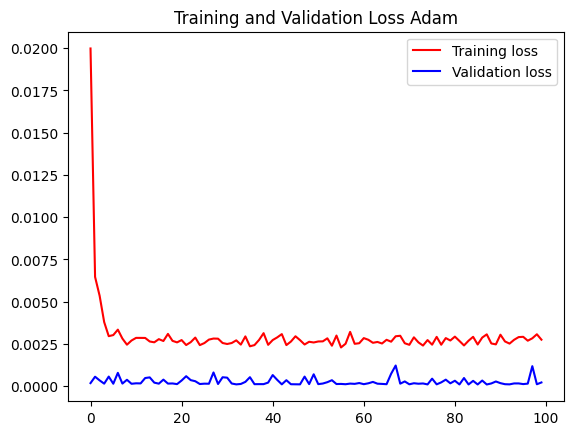

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss Adam')
plt.legend(loc=0)
plt.figure()